In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from xgboost import XGBRegressor
import lightgbm as lgb
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns




In [2]:
ruta = '../data/retail_sales_dataset.csv'
df = pd.read_csv(filepath_or_buffer=ruta, sep=',')
df.shape

(1000, 9)

## Parte 3: Benchmarking de Técnicas de Machine Learning

### 1. Selección de Modelos:
* Entrenar y evaluar múltiples modelos de machine learning (por ejemplo, Regresión Lineal, KNN, Árbol de Decisión, Random Forest, XGBoost y LGBM).
* Utilizar validación cruzada para evaluar el rendimiento de los modelos.

In [3]:
# Definir características (X) y etiqueta (y)
X = df.drop(columns=['Transaction ID', 'Date', 'Customer ID', 'Total Amount'])
y = df['Total Amount']

In [4]:
# Definir las columnas numéricas y categóricas
numeric_cols = ['Age', 'Quantity', 'Price per Unit']
categorical_cols = ['Gender', 'Product Category']

# Crear un ColumnTransformer para aplicar las transformaciones
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='mean')),  # Imputación de valores faltantes
            ('scaler', StandardScaler())  # Escalado de variables numéricas
        ]), numeric_cols),
        
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),  # Imputación de valores faltantes
            ('onehot', OneHotEncoder(handle_unknown='ignore'))  # Codificación OneHot
        ]), categorical_cols)
    ])


In [5]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


In [6]:
# Pipeline para regresión lineal
lr_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Entrenar el modelo
lr_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lr = lr_pipeline.predict(X_test)

# Evaluar el modelo
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f"Regresión Lineal - MSE: {mse_lr:.2f}, R²: {r2_lr:.2f}")


Regresión Lineal - MSE: 41972.10, R²: 0.86


In [7]:
# Pipeline para KNN
knn_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', KNeighborsRegressor())
])

# Entrenar el modelo
knn_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_knn = knn_pipeline.predict(X_test)

# Evaluar el modelo
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN - MSE: {mse_knn:.2f}, R²: {r2_knn:.2f}")


KNN - MSE: 12245.40, R²: 0.96


In [8]:
# Pipeline para Árbol de Decisión
dt_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', DecisionTreeRegressor(random_state=42))
])

# Entrenar el modelo
dt_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_dt = dt_pipeline.predict(X_test)

# Evaluar el modelo
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Árbol de Decisión - MSE: {mse_dt:.2f}, R²: {r2_dt:.2f}")


Árbol de Decisión - MSE: 0.00, R²: 1.00


In [9]:
# Pipeline para Random Forest
rf_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
rf_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf_pipeline.predict(X_test)

# Evaluar el modelo
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print(f"Random Forest - MSE: {mse_rf:.2f}, R²: {r2_rf:.2f}")


Random Forest - MSE: 0.00, R²: 1.00


In [20]:
# Pipeline para XGBoost
xgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', XGBRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
xgb_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_xgb = xgb_pipeline.predict(X_test)

# Evaluar el modelo
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"XGBoost - MSE: {mse_xgb:.2f}, R²: {r2_xgb:.2f}")


XGBoost - MSE: 0.00, R²: 1.00


In [21]:
# Pipeline para LightGBM
lgb_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', lgb.LGBMRegressor(n_estimators=100, random_state=42))
])

# Entrenar el modelo
lgb_pipeline.fit(X_train, y_train)

# Realizar predicciones
y_pred_lgb = lgb_pipeline.predict(X_test)

# Evaluar el modelo
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)
print(f"LightGBM - MSE: {mse_lgb:.2f}, R²: {r2_lgb:.2f}")


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001796 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 750, number of used features: 8
[LightGBM] [Info] Start training from score 448.926667
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i

               Model           MSE        R²
0   Regresión Lineal  4.197210e+04  0.860476
1                KNN  1.224540e+04  0.959294
2  Árbol de Decisión  0.000000e+00  1.000000
3      Random Forest  0.000000e+00  1.000000
4            XGBoost  8.814503e-09  1.000000
5           LightGBM  2.127980e-04  1.000000


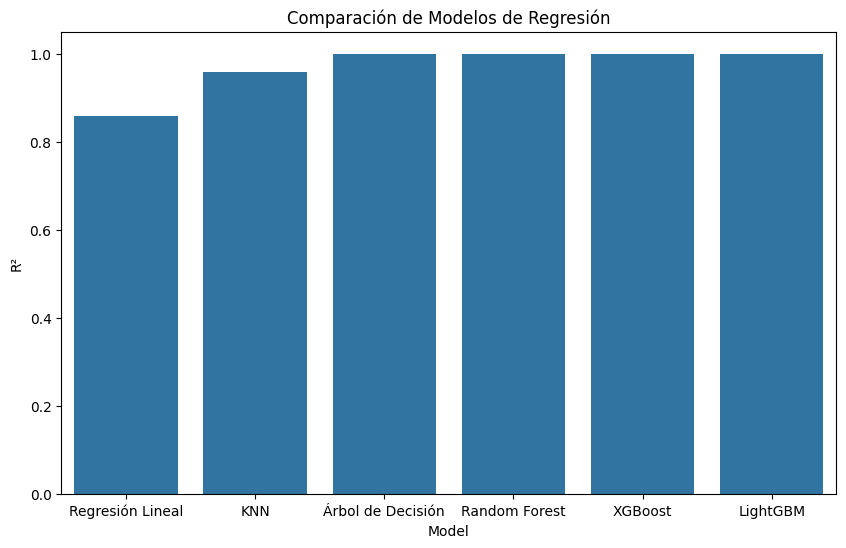

In [22]:
# Crear un diccionario con los resultados
results = {
    'Model': ['Regresión Lineal', 'KNN', 'Árbol de Decisión', 'Random Forest', 'XGBoost', 'LightGBM'],
    'MSE': [mse_lr, mse_knn, mse_dt, mse_rf, mse_xgb, mse_lgb],
    'R²': [r2_lr, r2_knn, r2_dt, r2_rf, r2_xgb, r2_lgb]
}

# Crear un DataFrame para los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)

# Graficar los resultados
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='R²', data=results_df)
plt.title('Comparación de Modelos de Regresión')
plt.show()


In [23]:

# Aplicar validación cruzada
cv_scores_lr = cross_val_score(lr_pipeline, X, y, cv=5, scoring='r2')  # 5 pliegues

print(f"Regresión Lineal - R²: {cv_scores_lr.mean():.2f} (± {cv_scores_lr.std():.2f})")


Regresión Lineal - R²: 0.84 (± 0.02)


In [24]:
# Aplicar validación cruzada
cv_scores_knn = cross_val_score(knn_pipeline, X, y, cv=5, scoring='r2')
print(f"KNN - R²: {cv_scores_knn.mean():.2f} (± {cv_scores_knn.std():.2f})")

KNN - R²: 0.96 (± 0.01)


In [25]:
# Aplicar validación cruzada
cv_scores_dt = cross_val_score(dt_pipeline, X, y, cv=5, scoring='r2')

print(f"Árbol de Decisión - R²: {cv_scores_dt.mean():.2f} (± {cv_scores_dt.std():.2f})")

Árbol de Decisión - R²: 1.00 (± 0.00)


In [26]:
# Aplicar validación cruzada
cv_scores_rf = cross_val_score(rf_pipeline, X, y, cv=5, scoring='r2')

print(f"Random Forest - R²: {cv_scores_rf.mean():.2f} (± {cv_scores_rf.std():.2f})")

Random Forest - R²: 1.00 (± 0.00)


In [27]:
# Aplicar validación cruzada
cv_scores_xgb = cross_val_score(xgb_pipeline, X, y, cv=5, scoring='r2')

print(f"XGBoost - R²: {cv_scores_xgb.mean():.2f} (± {cv_scores_xgb.std():.2f})")

XGBoost - R²: 1.00 (± 0.00)


In [28]:
# Aplicar validación cruzada
cv_scores_lgb = cross_val_score(lgb_pipeline, X, y, cv=5, scoring='r2')

print(f"LightGBM - R²: {cv_scores_lgb.mean():.2f} (± {cv_scores_lgb.std():.2f})")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 69
[LightGBM] [Info] Number of data points in the train set: 800, number of used features: 8
[LightGBM] [Info] Start training from score 440.456250
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [29]:
# Crear un diccionario con los resultados
results = {
    'Model': ['Regresión Lineal', 'KNN', 'Árbol de Decisión', 'Random Forest', 'XGBoost', 'LightGBM'],
    'R² Mean': [cv_scores_lr.mean(), cv_scores_knn.mean(), cv_scores_dt.mean(), cv_scores_rf.mean(), cv_scores_xgb.mean(), cv_scores_lgb.mean()],
    'R² Std': [cv_scores_lr.std(), cv_scores_knn.std(), cv_scores_dt.std(), cv_scores_rf.std(), cv_scores_xgb.std(), cv_scores_lgb.std()]
}

# Crear un DataFrame para los resultados
results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)



               Model   R² Mean        R² Std
0   Regresión Lineal  0.844892  2.392122e-02
1                KNN  0.961380  7.916270e-03
2  Árbol de Decisión  1.000000  0.000000e+00
3      Random Forest  1.000000  0.000000e+00
4            XGBoost  1.000000  0.000000e+00
5           LightGBM  1.000000  1.606847e-11


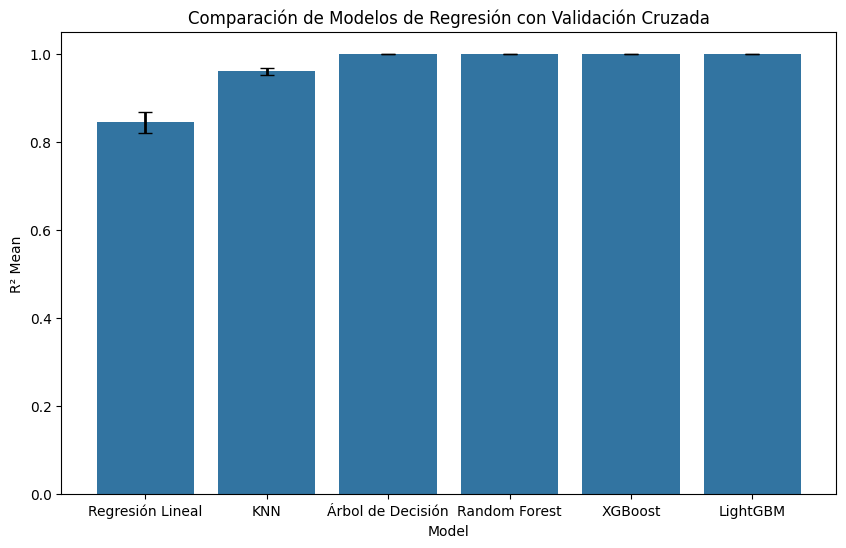

In [30]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='Model', y='R² Mean', data=results_df, capsize=5)

# Añadir las barras de error manualmente usando plt.errorbar
plt.errorbar(x=np.arange(len(results_df)), 
             y=results_df['R² Mean'], 
             yerr=results_df['R² Std'], 
             fmt='none',  # No marcar los puntos, solo las barras de error
             capsize=5, 
             color='black', 
             elinewidth=2)

# Título y mostrar el gráfico
plt.title('Comparación de Modelos de Regresión con Validación Cruzada')
plt.show()

### Comparación de Modelos:
* Comparar los modelos utilizando métricas de rendimiento como exactitud, precisión, recall, F1-Score y ROC-AUC.
* Seleccionar el mejor modelo basado en las métricas obtenidas.

In [ ]:
# Definir los modelos que vamos a comparar
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Diccionario para almacenar las métricas de cada modelo
results = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": [],
    "ROC-AUC": []
}

# Entrenar y evaluar cada modelo
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calcular las métricas
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])  # Probabilidad de la clase positiva
    
    # Almacenar los resultados
    results["Model"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Precision"].append(precision)
    results["Recall"].append(recall)
    results["F1-Score"].append(f1)
    results["ROC-AUC"].append(roc_auc)

# Convertir a DataFrame para mejor visualización

results_df = pd.DataFrame(results)

# Mostrar los resultados
print(results_df)

## Parte 4: Análisis de Métricas

### 1. Informe de Clasificación:
* Generar un informe de clasificación para los modelos evaluados.
* Incluir la matriz de confusión para una comprensión detallada de los errores de clasificación.

In [ ]:
# Definir los modelos que vamos a comparar
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Entrenar y evaluar los modelos en el conjunto de prueba
classification_reports = {}

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir las etiquetas en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Generar el informe de clasificación
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Almacenar el informe de clasificación en el diccionario
    classification_reports[model_name] = report

# Mostrar el informe para cada modelo
for model_name, report in classification_reports.items():
    print(f"Clasificación para el modelo: {model_name}")
    print(pd.DataFrame(report).transpose())
    print("\n" + "="*50 + "\n")

In [ ]:
# Definir los modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dividir los datos en entrenamiento y prueba (suponiendo que X e y ya están definidos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Generar la matriz de confusión para cada modelo
for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Hacer las predicciones
    y_pred = model.predict(X_test)
    
    # Generar la matriz de confusión
    cm = confusion_matrix(y_test, y_pred)
    
    # Mostrar la matriz de confusión con un gráfico
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title(f'Matriz de Confusión - {model_name}')
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.show()


### 2. Curva ROC y AUC:
* Crear y visualizar la curva ROC para los modelos de clasificación binaria.
* Calcular el AUC para evaluar la capacidad del modelo para distinguir entre clases.

In [ ]:
# Definir los modelos a evaluar
models = {
    "Logistic Regression": LogisticRegression(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier()
}

# Dividir los datos en entrenamiento y prueba (suponiendo que X e y ya están definidos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un gráfico para visualizar las curvas ROC
plt.figure(figsize=(10, 8))

for model_name, model in models.items():
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Obtener las probabilidades de predicción (probabilidad de ser clase positiva)
    y_prob = model.predict_proba(X_test)[:, 1]
    
    # Calcular la curva ROC
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Calcular el AUC
    roc_auc = auc(fpr, tpr)
    
    # Graficar la curva ROC
    plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

# Graficar la línea diagonal de no discriminación (AUC = 0.5)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Etiquetas y título
plt.title('Curvas ROC de Modelos de Clasificación')
plt.xlabel('Tasa de Falsos Positivos (FPR)')
plt.ylabel('Tasa de Verdaderos Positivos (TPR)')
plt.legend(loc='lower right')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.grid(True)
plt.show()

In [ ]:
# Encontrar el mejor umbral para el modelo con el mayor AUC
best_threshold = thresholds[np.argmax(tpr - fpr)]
print(f"Mejor umbral para {model_name}: {best_threshold:.2f}")